
# SUMMARY

The dataset contains information regarding direct marketing campaigns conducted by a Portuguese banking institution, primarily through phone calls, aimed at promoting bank term deposits. The campaigns often involved multiple contacts with clients to determine their subscription decision. The dataset includes various attributes:

### 1. Client Information:
- age: age of client (numeric)
- job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
- marital : marital status (categorical: "married", "divorced", "single")
- education: client highest education (categorical: "unknown", "secondary", "primary", "tertiary")
- default: has credit in default? (binary/2-categories: "yes", "no")
- balance: average yearly balance, in euros (numeric)
- housing: has housing loan? (binary/2-categories: "yes", "no")
- loan: has personal loan? (binary/2-categories: "yes", "no")

### 2. Campaign Information (related to the last contact):
- contact: contact communication type (categorical: "unknown", "telephone", "cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)

### 3. Other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign ( categorical: 'unknown","other", "failure", "success")

### 4. Target variable:
- y: has the client subscribed a term deposit? (binary: "yes", "no")


## PART 1: CREATE SPARK SESSION AND IMPORT THE DATASET
- Create a basic SparkSession
- Import dataset from databricks cloud

In [0]:
# The entry point into all functionality in Spark is the SparkSession class. To create a basic SparkSession, use SparkSession.builder

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Big Data") \
    .getOrCreate()

In [0]:
# Import necessary pyspark functions/features/evaluations

from pyspark.ml import Pipeline
from pyspark.sql import functions as F
from pyspark.sql.functions import mean, split, col, regexp_extract, when, lit
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import QuantileDiscretizer

In [0]:
# File location and type
file_location = "/FileStore/tables/bank_full.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ";"

# The applied options are for CSV files. For other file types, these will be ignored.
bank_df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(bank_df)

age job marital education default balance housing loan contact day month duration campaign pdays previous poutcome y 58 management married tertiary no 2143 yes no unknown 5 may 261 1 -1 0 unknown no 44 technician single secondary no 29 yes no unknown 5 may 151 1 -1 0 unknown no 33 entrepreneur married secondary no 2 yes yes unknown 5 may 76 1 -1 0 unknown no 47 blue-collar married unknown no 1506 yes no unknown 5 may 92 1 -1 0 unknown no 33 unknown single unknown no 1 no no unknown 5 may 198 1 -1 0 unknown no 35 management married tertiary no 231 yes no unknown 5 may 139 1 -1 0 unknown no 28 management single tertiary no 447 yes yes unknown 5 may 217 1 -1 0 unknown no 42 entrepreneur divorced tertiary yes 2 yes no unknown 5 may 380 1 -1 0 unknown no 58 retired married primary no 121 yes no unknown 5 may 50 1 -1 0 unknown no 43 technician single secondary no 593 yes no unknown 5 may 55 1 -1 0 unknown no 41 admin. divorced secondary no 270 yes no unknown 5 may 222 1 -1 0 unknown no 29 admin. single secondary no 390 yes no unknown 5 may 137 1 -1 0 unknown no 53 technician married secondary no 6 yes no unknown 5 may 517 1 -1 0 unknown no 58 technician married unknown no 71 yes no unknown 5 may 71 1 -1 0 unknown no 57 services married secondary no 162 yes no unknown 5 may 174 1 -1 0 unknown no 51 retired married primary no 229 yes no unknown 5 may 353 1 -1 0 unknown no 45 admin. single unknown no 13 yes no unknown 5 may 98 1 -1 0 unknown no 57 blue-collar married primary no 52 yes no unknown 5 may 38 1 -1 0 unknown no 60 retired married primary no 60 yes no unknown 5 may 219 1 -1 0 unknown no 33 services married secondary no 0 yes no unknown 5 may 54 1 -1 0 unknown no 28 blue-collar married secondary no 723 yes yes unknown 5 may 262 1 -1 0 unknown no 56 management married tertiary no 779 yes no unknown 5 may 164 1 -1 0 unknown no 32 blue-collar single primary no 23 yes yes unknown 5 may 160 1 -1 0 unknown no 25 services married secondary no 50 yes no unknown 5 may 342 1 -1 0 unknown no 40 retired married primary no 0 yes yes unknown 5 may 181 1 -1 0 unknown no 44 admin. married secondary no -372 yes no unknown 5 may 172 1 -1 0 unknown no 39 management single tertiary no 255 yes no unknown 5 may 296 1 -1 0 unknown no 52 entrepreneur married secondary no 113 yes yes unknown 5 may 127 1 -1 0 unknown no 46 management single secondary no -246 yes no unknown 5 may 255 2 -1 0 unknown no 36 technician single secondary no 265 yes yes unknown 5 may 348 1 -1 0 unknown no 57 technician married secondary no 839 no yes unknown 5 may 225 1 -1 0 unknown no 49 management married tertiary no 378 yes no unknown 5 may 230 1 -1 0 unknown no 60 admin. married secondary no 39 yes yes unknown 5 may 208 1 -1 0 unknown no 59 blue-collar married secondary no 0 yes no unknown 5 may 226 1 -1 0 unknown no 51 management married tertiary no 10635 yes no unknown 5 may 336 1 -1 0 unknown no 57 technician divorced secondary no 63 yes no unknown 5 may 242 1 -1 0 unknown no 25 blue-collar married secondary no -7 yes no unknown 5 may 365 1 -1 0 unknown no 53 technician married secondary no -3 no no unknown 5 may 1666 1 -1 0 unknown no 36 admin. divorced secondary no 506 yes no unknown 5 may 577 1 -1 0 unknown no 37 admin. single secondary no 0 yes no unknown 5 may 137 1 -1 0 unknown no 44 services divorced secondary no 2586 yes no unknown 5 may 160 1 -1 0 unknown no 50 management married secondary no 49 yes no unknown 5 may 180 2 -1 0 unknown no 60 blue-collar married unknown no 104 yes no unknown 5 may 22 1 -1 0 unknown no 54 retired married secondary no 529 yes no unknown 5 may 1492 1 -1 0 unknown no 58 retired married unknown no 96 yes no unknown 5 may 616 1 -1 0 unknown no 36 admin. single primary no -171 yes no unknown 5 may 242 1 -1 0 unknown no 58 self-employed married tertiary no -364 yes no unknown 5 may 355 1 -1 0 unknown no 44 technician married secondary no 0 yes no unknown 5 may 225 2 -1 0 unknown no 55 technician divorced secondary no 0 no no unknown 5 ma

In [0]:
# View the first five rows of the dataset

bank_df.show(5)

# Which features are categorical?  - 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'
# Which features are numerical? - 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'

+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|  management|married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|
| 44|  technician| single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|
| 33|entrepreneur|married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|
| 47| blue-collar|married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|
| 33|     unknown| single|  unknown|     no|      1|     no|  no|unknown|  5|  may|     19


## PART 2: DATA UNDERSTANDING
To gain insights into the dataset, a comprehensive analysis of its structure, features, and statistical properties is conducted. For learning and experience purpose, this section will be analyzed using both PySpark and Pandas. Understanding the dataset is crucial for making informed decisions during subsequent steps. This includes: 
- Examining data types
- Generating descriptive statistics
- Checking for missing values
- Checking the correlation between each columns and the target variables


## PART 2.1: DATA UNDERSTANDING WITH PYSPARK

In [0]:
# Review the schema of dataset
# As can be seen, the variable types in the dataset are incorrect. 
# For example, 'age' should be of type 'integer' rather than 'string'.
# In conclusion, changing variable types must be done in data preprocessing step.

bank_df.printSchema()

root
 |-- age: string (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: string (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- campaign: string (nullable = true)
 |-- pdays: string (nullable = true)
 |-- previous: string (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [0]:
### Convert data type

# Convert the 'age' column to integer type
bank_df = bank_df.withColumn("age", col("age").cast("int"))

# Convert the 'balance' column to integer type
bank_df = bank_df.withColumn("balance", col("balance").cast("int"))

# Convert the 'day' column to integer type
bank_df = bank_df.withColumn("day", col("day").cast("int"))

# Convert the 'duration' column to integer type
bank_df = bank_df.withColumn("duration", col("duration").cast("int"))

# Convert the 'campaign' column to integer type
bank_df = bank_df.withColumn("campaign", col("campaign").cast("int"))

# Convert the 'pdays' column to integer type
bank_df = bank_df.withColumn("pdays", col("pdays").cast("int"))

# Convert the 'previous' column to integer type
bank_df = bank_df.withColumn("previous", col("previous").cast("int"))

In [0]:
# Check the schema of dataset again to make sure the datatypes are correctly changed

bank_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [0]:
"""
Given that the bank full dataset is extensive, comprising 17 attributes and encompassing 45211 instances/datapoints, I will extract 10% of the dataset to serve as a sample for analysis and model building. 
This approach aims to mitigate computational demands while still providing a representative subset for thorough examination. 
A 10% sample is deemed sufficient for initiating the analysis and effectively showcasing insights derived from the dataset.
"""
# 10% of the data
bank_sample = bank_df.sample(withReplacement=False,
                                  fraction=0.1,
                                  seed=42)

In [0]:
# View the first five rows of the sample DataFrame

bank_sample.show(5)

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 42|entrepreneur|divorced| tertiary|    yes|      2|    yes|  no|unknown|  5|  may|     380|       1|   -1|       0| unknown| no|
| 45|      admin.|  single|  unknown|     no|     13|    yes|  no|unknown|  5|  may|      98|       1|   -1|       0| unknown| no|
| 60|     retired| married|  primary|     no|     60|    yes|  no|unknown|  5|  may|     219|       1|   -1|       0| unknown| no|
| 54| blue-collar| married|secondary|     no|   1291|    yes|  no|unknown|  5|  may|     266|       1|   -1|       0| unknown| no|
| 40| blue-collar|  single|  unknown|     no|     24|    yes|  no|unknown|  5|  may

In [0]:
# Display basic descriptive statistics of of the sample DataFrame

bank_sample.describe().show()

+-------+------------------+-------+--------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+----+
|summary|               age|    job| marital|education|default|           balance|housing|loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|   y|
+-------+------------------+-------+--------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+----+
|  count|              4452|   4452|    4452|     4452|   4452|              4452|   4452|4452|    4452|              4452| 4452|              4452|              4452|              4452|              4452|    4452|4452|
|   mean| 40.82389937106918|   null|    null|     null|   null|1301.2812219227314|   null|null|    null|15.7661725067385

In [0]:
## CHECKING NULL VALUES ##

# Define a function to calculate the count of null values in each column of a DataFrame
def null_value_count(df):
    # Initialize an empty list to store tuples containing column names and their respective null value counts
    null_columns_counts = []

    # Get the total number of rows in the DataFrame
    numRows = df.count()

    # Iterate over each column in the DataFrame
    for k in df.columns:
        # Count the number of null rows in the current column
        nullRows = df.where(col(k).isNull()).count()

        # Check if there are any null values in the column
        if nullRows > 0:
            # Create a tuple containing the column name and its null value count, and add it to the list
            temp = k, nullRows
            null_columns_counts.append(temp)

    # Return the list of tuples containing column names and their respective null value counts
    return null_columns_counts

In [0]:
# Call the previously defined function to calculate the count of null values for each column in the sample DataFrame
# The sample Dataframe do not have any null/nan/missing values.

null_columns_count_list = null_value_count(bank_sample)
null_columns_count_list

Out[12]: []

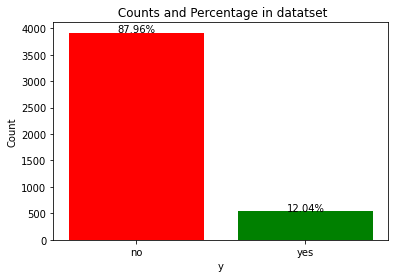

In [0]:
## Visualize the target variables - 'y' rate ##

# Import matplotlib 
import matplotlib.pyplot as plt

# Show the survival rate
y_counts = bank_sample.groupBy("y").count().collect()

# Extract values for plotting
labels = [str(row["y"]) for row in y_counts]
counts = [row["count"] for row in y_counts]

# Calculate percentages
total_y = sum(counts)
percentages = [count / total_y * 100 for count in counts]

# Create a bar plot using Matplotlib
plt.bar(labels, counts, color=['red', 'green'])

# Add percentage labels above each bar
for label, count, percentage in zip(labels, counts, percentages):
    plt.text(label, count + 5, f"{percentage:.2f}%", ha='center')

plt.title(" Counts and Percentage in datatset")
plt.xlabel("y")
plt.ylabel("Count")
plt.show()


## PART 2.2: DATA UNDERSTANDING WITH PANDAS

In [0]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [0]:
# Convert Spark DataFrame 'bank_sample' to a Pandas DataFrame for easier manipulation and analysis.

bank_sample_pd = bank_sample.toPandas()

In [0]:
# Display the first few rows (head) of the DataFrame to inspect the data
bank_sample_pd.head()

age 
 job 
 marital 
 education 
 default 
 balance 
 housing 
 loan 
 contact 
 day 
 month 
 duration 
 campaign 
 pdays 
 previous 
 poutcome 
 y 
 
 
 
 
 0 
 42 
 entrepreneur 
 divorced 
 tertiary 
 yes 
 2 
 yes 
 no 
 unknown 
 5 
 may 
 380 
 1 
 -1 
 0 
 unknown 
 no 
 
 
 1 
 45 
 admin. 
 single 
 unknown 
 no 
 13 
 yes 
 no 
 unknown 
 5 
 may 
 98 
 1 
 -1 
 0 
 unknown 
 no 
 
 
 2 
 60 
 retired 
 married 
 primary 
 no 
 60 
 yes 
 no 
 unknown 
 5 
 may 
 219 
 1 
 -1 
 0 
 unknown 
 no 
 
 
 3 
 54 
 blue-collar 
 married 
 secondary 
 no 
 1291 
 yes 
 no 
 unknown 
 5 
 may 
 266 
 1 
 -1 
 0 
 unknown 
 no 
 
 
 4 
 40 
 blue-collar 
 single 
 unknown 
 no 
 24 
 yes 
 no 
 unknown 
 5 
 may 
 185 
 1 
 -1 
 0 
 unknown 
 no

In [0]:
# Display the last few rows (tail) of the DataFrame to further inspect the data
bank_sample_pd.tail()

age 
 job 
 marital 
 education 
 default 
 balance 
 housing 
 loan 
 contact 
 day 
 month 
 duration 
 campaign 
 pdays 
 previous 
 poutcome 
 y 
 
 
 
 
 4447 
 28 
 self-employed 
 single 
 tertiary 
 no 
 159 
 no 
 no 
 cellular 
 16 
 nov 
 449 
 2 
 33 
 4 
 success 
 yes 
 
 
 4448 
 34 
 blue-collar 
 single 
 secondary 
 no 
 1475 
 yes 
 no 
 cellular 
 16 
 nov 
 1166 
 3 
 530 
 12 
 other 
 no 
 
 
 4449 
 34 
 admin. 
 single 
 secondary 
 no 
 557 
 no 
 no 
 cellular 
 17 
 nov 
 224 
 1 
 -1 
 0 
 unknown 
 yes 
 
 
 4450 
 51 
 technician 
 married 
 tertiary 
 no 
 825 
 no 
 no 
 cellular 
 17 
 nov 
 977 
 3 
 -1 
 0 
 unknown 
 yes 
 
 
 4451 
 71 
 retired 
 divorced 
 primary 
 no 
 1729 
 no 
 no 
 cellular 
 17 
 nov 
 456 
 2 
 -1 
 0 
 unknown 
 yes

In [0]:
# Generate essential information about the sample DataFrame
# There are 17 columns in the sample DataFrame, with 4452 datapoints
# The types of all columns are correctly identified

bank_sample_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4452 entries, 0 to 4451
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4452 non-null   int32 
 1   job        4452 non-null   object
 2   marital    4452 non-null   object
 3   education  4452 non-null   object
 4   default    4452 non-null   object
 5   balance    4452 non-null   int32 
 6   housing    4452 non-null   object
 7   loan       4452 non-null   object
 8   contact    4452 non-null   object
 9   day        4452 non-null   int32 
 10  month      4452 non-null   object
 11  duration   4452 non-null   int32 
 12  campaign   4452 non-null   int32 
 13  pdays      4452 non-null   int32 
 14  previous   4452 non-null   int32 
 15  poutcome   4452 non-null   object
 16  y          4452 non-null   object
dtypes: int32(7), object(10)
memory usage: 469.7+ KB


In [0]:
# Retrieve and print the dimensions (number of rows and columns) of the DataFrame
# Dataset has 4452 rows and 17 columns

bank_sample_pd.shape

Out[19]: (4452, 17)

In [0]:
# Create descriptive statistics for each column in the DataFrame

bank_sample_pd.describe(include='all')

age 
 job 
 marital 
 education 
 default 
 balance 
 housing 
 loan 
 contact 
 day 
 month 
 duration 
 campaign 
 pdays 
 previous 
 poutcome 
 y 
 
 
 
 
 count 
 4452.000000 
 4452 
 4452 
 4452 
 4452 
 4452.000000 
 4452 
 4452 
 4452 
 4452.000000 
 4452 
 4452.000000 
 4452.000000 
 4452.000000 
 4452.000000 
 4452 
 4452 
 
 
 unique 
 NaN 
 12 
 3 
 4 
 2 
 NaN 
 2 
 2 
 3 
 NaN 
 12 
 NaN 
 NaN 
 NaN 
 NaN 
 4 
 2 
 
 
 top 
 NaN 
 blue-collar 
 married 
 secondary 
 no 
 NaN 
 yes 
 no 
 cellular 
 NaN 
 may 
 NaN 
 NaN 
 NaN 
 NaN 
 unknown 
 no 
 
 
 freq 
 NaN 
 1001 
 2678 
 2280 
 4365 
 NaN 
 2533 
 3742 
 2817 
 NaN 
 1409 
 NaN 
 NaN 
 NaN 
 NaN 
 3662 
 3916 
 
 
 mean 
 40.823899 
 NaN 
 NaN 
 NaN 
 NaN 
 1301.281222 
 NaN 
 NaN 
 NaN 
 15.766173 
 NaN 
 262.475741 
 2.642183 
 40.081087 
 0.548967 
 NaN 
 NaN 
 
 
 std 
 10.672321 
 NaN 
 NaN 
 NaN 
 NaN 
 2673.620837 
 NaN 
 NaN 
 NaN 
 8.343631 
 NaN 
 268.045161 
 2.835527 
 101.952112 
 1.754304 
 NaN 
 NaN 
 
 
 min 
 18.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 -8019.000000 
 NaN 
 NaN 
 NaN 
 1.000000 
 NaN 
 3.000000 
 1.000000 
 -1.000000 
 0.000000 
 NaN 
 NaN 
 
 
 25% 
 33.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 75.000000 
 NaN 
 NaN 
 NaN 
 8.000000 
 NaN 
 105.000000 
 1.000000 
 -1.000000 
 0.000000 
 NaN 
 NaN 
 
 
 50% 
 39.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 443.000000 
 NaN 
 NaN 
 NaN 
 16.000000 
 NaN 
 182.000000 
 2.000000 
 -1.000000 
 0.000000 
 NaN 
 NaN 
 
 
 75% 
 48.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 1424.000000 
 NaN 
 NaN 
 NaN 
 21.000000 
 NaN 
 323.000000 
 3.000000 
 -1.000000 
 0.000000 
 NaN 
 NaN 
 
 
 max 
 94.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 41630.000000 
 NaN 
 NaN 
 NaN 
 31.000000 
 NaN 
 3422.000000 
 58.000000 
 871.000000 
 29.000000 
 NaN 
 NaN

In [0]:
# Define categorical and numerical features based on column names in the DataFrame.
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in bank_sample_pd.columns.to_list() if x not in categorical]
numerical.remove('y')  # Remove the target variable if present in numerical features

# Print the defined categorical and numerical features
print('Categorical features:', categorical)
print('Numerical features:', numerical)


Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']



### 2.2.1 MISSING VALUE DETECTIONS

In [0]:
# Checkout unique values and the number of missing values for each column

# Iterates through each column in the DataFrame
for column in bank_sample_pd.columns:
    # Print the column name, unique values, and the number of missing values
    print(f"{column}. Number of missing values: {bank_sample_pd[column].isna().sum()}")

# There are no missing values in the dataframe.

age. Number of missing values: 0
job. Number of missing values: 0
marital. Number of missing values: 0
education. Number of missing values: 0
default. Number of missing values: 0
balance. Number of missing values: 0
housing. Number of missing values: 0
loan. Number of missing values: 0
contact. Number of missing values: 0
day. Number of missing values: 0
month. Number of missing values: 0
duration. Number of missing values: 0
campaign. Number of missing values: 0
pdays. Number of missing values: 0
previous. Number of missing values: 0
poutcome. Number of missing values: 0
y. Number of missing values: 0


### 2.2.2 DATA VISUALIZATION

In [0]:
# Computes and displays the count of occurrences for each unique value in the 'y' column of the DataFrame

bank_sample_pd.y.value_counts()

Out[23]: no     3916
yes     536
Name: y, dtype: int64

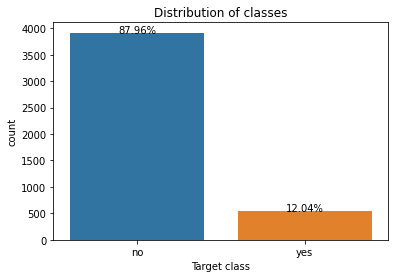

In [0]:
# Visualize the target variable - y
# As can be seen from the graph, the 'no' attribute accounts for 87.96%, while the 'yes' attribute only accounts for 12.04%. 
# Therefore, the dataset is heavily imbalanced. Balancing might be necessary during data processing.

import seaborn as sns
from matplotlib import pyplot as plt

# Create the countplot
sns.countplot(x=bank_sample_pd['y'])

# Calculate the percentage of each class
total_count = len(bank_sample_pd['y'])
counts = bank_sample_pd['y'].value_counts()
for i in range(len(counts)):
    count = counts[i]
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center')

# Set plot title and labels
plt.title('Distribution of classes')
plt.xlabel('Target class')

# Show the plot
plt.show()

Out[25]: Text(0.5, 0, 'y: target variable')

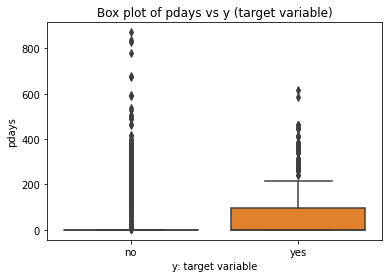

In [0]:
# Examine the correlation between target variable 'y' and 'pdays' column
# Create a box plot to visualize the distribution of 'pdays' with respect to the target variable 'y'
sns.boxplot(y=bank_sample_pd['pdays'], x=bank_sample_pd['y'])
plt.title('Box plot of pdays vs y (target variable)')
plt.xlabel('y: target variable')

/databricks/python/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Out[26]: Text(0.5, 1.0, 'PDF of pdays for target variable y')

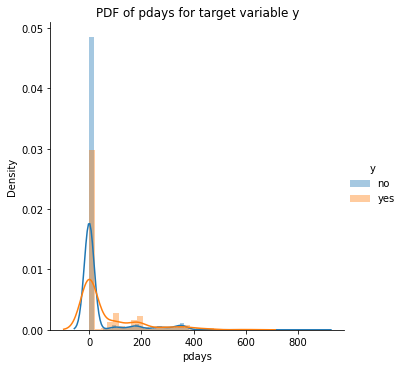

In [0]:
# Create a FacetGrid to visualize the probability density function (PDF) of 'pdays' for each value of the target variable 'y'
# It allows for a comparison of the distribution of 'pdays' between clients who subscribed ('yes') and those who didn't ('no').

sns.FacetGrid(bank_sample_pd, hue='y', size=5) \
.map(sns.distplot, 'pdays') \
.add_legend()
plt.title('PDF of pdays for target variable y')

In [0]:
# Calculate and print the percentage of 'pdays' that are less than or equal to certain quantiles
for x in range(95, 101, 1):
    print("{}% of pdays are less than or equal to {}".format(x, bank_sample_pd.pdays.quantile(x/100)))

# Calculate and print the interquartile range (IQR) of 'pdays'
iqr = bank_sample_pd.pdays.quantile(0.75) - bank_sample_pd.pdays.quantile(0.25)
print('IQR {}'.format(iqr))

95% of pdays are less than or equal to 317.4499999999998
96% of pdays are less than or equal to 340.0
97% of pdays are less than or equal to 350.0
98% of pdays are less than or equal to 360.0
99% of pdays are less than or equal to 371.0
100% of pdays are less than or equal to 871.0
IQR 0.0


In [0]:
'''
Observations between 'y' and 'pdays':
- There are outliers, as seen from the boxplot.
- The attribute 'pdays' appears to be an important feature, as there is a clear distinction in the quartile ranges of 'pdays' for the target variables 'yes' and 'no'.
- As the percentile increases, the number of days since the last contact also increases, indicating that a smaller proportion of clients were contacted recently compared to those contacted further in the past. Specifically, 75% of clients contacted through the campaign were not previously contacted.
'''

Out[28]: "\nObservations between 'y' and 'pdays':\n- There are outliers, as seen from the boxplot.\n- The attribute 'pdays' appears to be an important feature, as there is a clear distinction in the quartile ranges of 'pdays' for the target variables 'yes' and 'no'.\n- As the percentile increases, the number of days since the last contact also increases, indicating that a smaller proportion of clients were contacted recently compared to those contacted further in the past. Specifically, 75% of clients contacted through the campaign were not previously contacted.\n"

Out[29]: Text(0.5, 0, 'y:target variable')

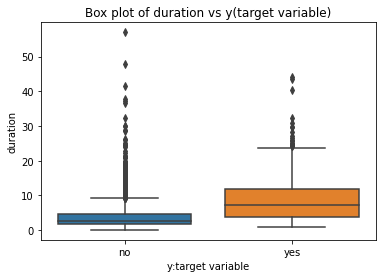

In [0]:
# Examine the correlation between target variable 'y' and 'duration' column
# Converting call duration from seconds to minute
bank_sample_pd['duration'] = bank_sample_pd['duration']/60

# Create a box plot to visualize the distribution of 'duration' with respect to the target variable 'y'
sns.boxplot(y=bank_sample_pd['duration'], x=bank_sample_pd['y'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')

/databricks/python/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Out[30]: Text(0.5, 1.0, 'PDF of duration for target variable y')

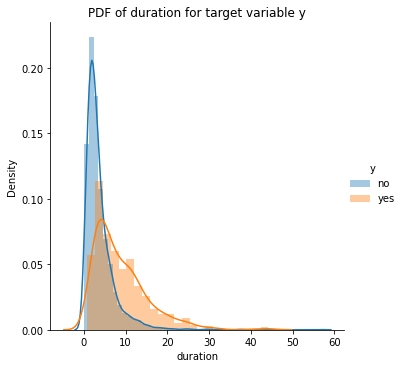

In [0]:
# Create a FacetGrid to visualize the probability density function (PDF) of 'duration' for each value of the target variable 'y'
# It allows for a comparison of the distribution of 'duration' between clients who subscribed ('yes') and those who didn't ('no').

sns.FacetGrid(bank_sample_pd, hue='y', size=5) \
.map(sns.distplot, 'duration') \
.add_legend()
plt.title('PDF of duration for target variable y')

In [0]:
# Calculate and print the percentage of 'duration' that are less than or equal to certain quantiles
for x in range(95, 101 , 1):
    print("{}% of calls have duration less than equal to {}".format(x, bank_sample_pd.duration.quantile(x/100)))

# Calculate and print the interquartile range (IQR) of 'duration'
iqr = bank_sample_pd.duration.quantile(0.75) - bank_sample_pd.duration.quantile(0.25)
print('IQR {}'.format(iqr))

95% of calls have duration less than equal to 12.74083333333333
96% of calls have duration less than equal to 13.799333333333335
97% of calls have duration less than equal to 15.39116666666667
98% of calls have duration less than equal to 17.616666666666667
99% of calls have duration less than equal to 21.827666666666545
100% of calls have duration less than equal to 57.03333333333333
IQR 3.6333333333333337


In [0]:
'''
Observations between 'y' and 'duration':
- There are outliers, as seen from the boxplot.
- The attribute 'duration' appears to be an important feature, as there is a clear distinction in the quartile ranges of 'pdays' for the target variables 'yes' and 'no'.
- As the percentile increases, the duration of calls also increases, indicating that a smaller proportion of calls have longer durations. Specifically, 75% of the calls have a duration less than or equal to 5.32 seconds. 
'''

Out[32]: "\nObservations between 'y' and 'duration':\n- There are outliers, as seen from the boxplot.\n- The attribute 'duration' appears to be an important feature, as there is a clear distinction in the quartile ranges of 'pdays' for the target variables 'yes' and 'no'.\n- As the percentile increases, the duration of calls also increases, indicating that a smaller proportion of calls have longer durations. Specifically, 75% of the calls have a duration less than or equal to 5.32 seconds. \n"

Out[33]: Text(0.5, 0, 'y:target variable')

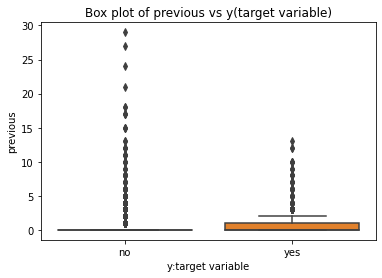

In [0]:
# Examine the correlation between target variable 'y' and 'previous' column

sns.boxplot(y=bank_sample_pd['previous'], x=bank_sample_pd['y'])
plt.title('Box plot of previous vs y(target variable)')
plt.xlabel('y:target variable')


/databricks/python/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Out[34]: Text(0.5, 1.0, 'PDF of previous values for target variable y')

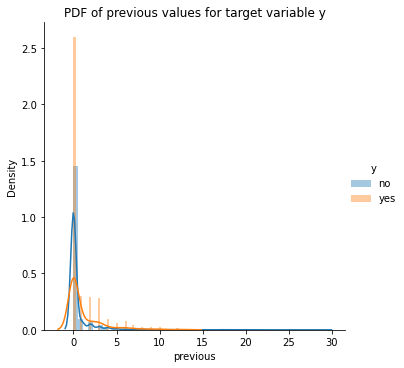

In [0]:
# Create a FacetGrid to visualize the probability density function (PDF) of 'previous' for each value of the target variable 'y'
# It allows for a comparison of the distribution of 'previous' between clients who subscribed ('yes') and those who didn't ('no').

sns.FacetGrid(bank_sample_pd, hue='y', size=5) \
.map(sns.distplot, 'previous') \
.add_legend()
plt.title('PDF of previous values for target variable y')

In [0]:
# Calculate and print the percentage of 'previous' that are less than or equal to certain quantiles
for x in range(95, 101 , 1):
    print("{}% of previous values less than equal to {}".format(x, bank_sample_pd.previous.quantile(x/100)))

# Calculate and print the interquartile range (IQR) of 'previous'
iqr = bank_sample_pd.previous.quantile(0.75) - bank_sample_pd.previous.quantile(0.25)
print('IQR {}'.format(iqr))

95% of previous values less than equal to 3.0
96% of previous values less than equal to 4.0
97% of previous values less than equal to 5.0
98% of previous values less than equal to 6.0
99% of previous values less than equal to 8.0
100% of previous values less than equal to 29.0
IQR 0.0


In [0]:
'''
Observations between 'y' and 'previous':
- There are outliers, as seen from the boxplot.
- The attribute 'previous' appears to be an important feature, as there is a clear distinction in the quartile ranges of 'pdays' for the target variables 'yes' and 'no'.
- The increasing values across percentiles indicate that fewer clients had a higher number of previous contacts, with the majority having a relatively low number of previous contacts.
- The calculated interquartile range (IQR) is 0.0. This suggests that there is no variability in the middle 50% of the data for the number of previous contacts. It implies that the majority of clients had the same number of previous contacts, indicating a potential pattern or characteristic within the dataset.
'''

Out[36]: "\nObservations between 'y' and 'previous':\n- There are outliers, as seen from the boxplot.\n- The attribute 'previous' appears to be an important feature, as there is a clear distinction in the quartile ranges of 'pdays' for the target variables 'yes' and 'no'.\n- The increasing values across percentiles indicate that fewer clients had a higher number of previous contacts, with the majority having a relatively low number of previous contacts.\n- The calculated interquartile range (IQR) is 0.0. This suggests that there is no variability in the middle 50% of the data for the number of previous contacts. It implies that the majority of clients had the same number of previous contacts, indicating a potential pattern or characteristic within the dataset.\n"

Out[37]: Text(0.5, 0, 'y:target variable')

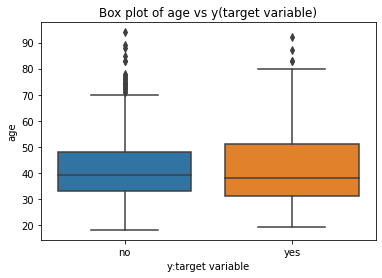

In [0]:
# Examine the correlation between target variable 'y' and 'age' column

sns.boxplot(y=bank_sample_pd['age'], x=bank_sample_pd['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')

/databricks/python/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Out[38]: Text(0.5, 1.0, 'PDF of age for target variable y')

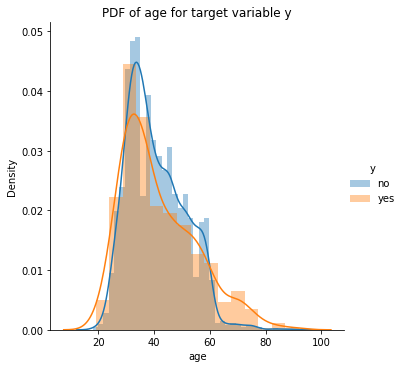

In [0]:
# Create a FacetGrid to visualize the probability density function (PDF) of 'age' for each value of the target variable 'y'
# It allows for a comparison of the distribution of 'age' between clients who subscribed ('yes') and those who didn't ('no').

sns.FacetGrid(bank_sample_pd, hue='y', size=5) \
.map(sns.distplot, 'age') \
.add_legend()
plt.title('PDF of age for target variable y')

In [0]:
# Calculate and print the percentage of 'age' that are less than or equal to certain quantiles
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, bank_sample_pd.age.quantile(x/100)))

# Calculate and print the interquartile range (IQR) of 'age'
iqr = bank_sample_pd.age.quantile(0.75) - bank_sample_pd.age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 59.0
96% of people having age are less than equal to 60.0
97% of people having age are less than equal to 60.0
98% of people having age are less than equal to 64.0
99% of people having age are less than equal to 71.0
100% of people having age are less than equal to 94.0
IQR 15.0


In [0]:
# Categorizes age groups based on the values in the "age" column.
# Define a list 'lst' containing a single DataFrame 'bank_sample_pd'.
lst = [bank_sample_pd]

# Iterate over each DataFrame in the list.
for column in lst:
    # Create a new column 'age_group' based on the age ranges.
    # Assign the value 30 to 'age_group' for individuals under 30 years old.
    column.loc[column["age"] < 30, 'age_group'] = 30
    # Assign the value 40 to 'age_group' for individuals aged 30 to 44.
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    # Assign the value 50 to 'age_group' for individuals aged 45 to 59.
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    # Assign the value 60 to 'age_group' for individuals aged 60 or above.
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [0]:
# Create a cross-tabulation of the target variable 'y' and the age groups.
# Compute the percentage distribution of responses within each age group.
count_age_response_pct = pd.crosstab(bank_sample_pd['y'], bank_sample_pd['age_group']).apply(lambda x: x / x.sum() * 100)

# Transpose the cross-tabulation to have age groups as rows and response categories as columns.
count_age_response_pct = count_age_response_pct.transpose()

count_age_response_pct

y 
 no 
 yes 
 
 
 age_group 
 
 
 
 
 
 
 30.0 
 83.106796 
 16.893204 
 
 
 40.0 
 89.454094 
 10.545906 
 
 
 50.0 
 89.864865 
 10.135135 
 
 
 60.0 
 68.449198 
 31.550802

Out[42]: <AxesSubplot:xlabel='age_group', ylabel='count'>

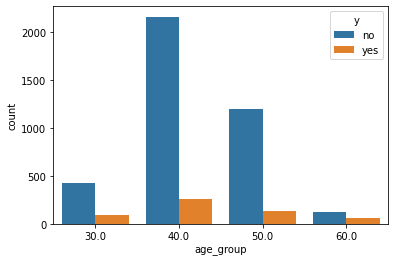

In [0]:
# Create a count plot to visualize the distribution of responses ('yes' and 'no') within each age group.
# 'age_group' is plotted on the x-axis, 'y' (response) is represented by the hue.

sns.countplot(x='age_group', data=bank_sample_pd, hue='y')

In [0]:
print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(bank_sample_pd[bank_sample_pd['age_group'] == 30]), bank_sample_pd[bank_sample_pd['age_group'] == 30].y.value_counts()[1]/len(bank_sample_pd[bank_sample_pd['age_group'] == 30])))
print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(bank_sample_pd[bank_sample_pd['age_group'] == 40]), bank_sample_pd[bank_sample_pd['age_group'] == 40].y.value_counts()[1]/len(bank_sample_pd[bank_sample_pd['age_group'] == 40])))
print('Clients of age 40-60 contacted: {}, Success rate: {}'.format(len(bank_sample_pd[bank_sample_pd['age_group'] == 50]), bank_sample_pd[bank_sample_pd['age_group'] == 50].y.value_counts()[1]/len(bank_sample_pd[bank_sample_pd['age_group'] == 50])))
print('Clients of 60+ age contacted: {}, Success rate: {}'.format(len(bank_sample_pd[bank_sample_pd['age_group'] == 60]), bank_sample_pd[bank_sample_pd['age_group'] == 60].y.value_counts()[1]/len(bank_sample_pd[bank_sample_pd['age_group'] == 60])))

'''
People with age < 30 or 60+ have higher success rate.
Only 3% of clients have age of 60+
'''

Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 515, Success rate: 0.16893203883495145
Clients of age 30-45 contacted: 2418, Success rate: 0.1054590570719603
Clients of age 40-60 contacted: 1332, Success rate: 0.10135135135135136
Clients of 60+ age contacted: 187, Success rate: 0.3155080213903743
Out[43]: '\nPeople with age < 30 or 60+ have higher success rate.\nOnly 3% of clients have age of 60+\n'

In [0]:
'''
Observations between 'y' and 'age':
- There are outliers, as seen from the boxplot.
- People with age < 30 or 60+ have a higher success rate.
- The majority of clients are in the age group of 40. Only 4% of clients are aged 60 or above, and 11% of clients are aged less than 30. 
Therefore, the target group of clients for success is relatively small.
'''

Out[44]: "\nObservations between 'y' and 'age':\n- There are outliers, as seen from the boxplot.\n- People with age < 30 or 60+ have a higher success rate.\n- The majority of clients are in the age group of 40. Only 4% of clients are aged 60 or above, and 11% of clients are aged less than 30. \nTherefore, the target group of clients for success is relatively small.\n"

In [0]:
# Examine the correlation between target variable 'y' and 'job' column
# Calculates the frequency count of unique values in the 'job' column of the DataFrame.

bank_sample_pd.job.value_counts()

Out[45]: blue-collar      1001
management        925
technician        775
admin.            504
services          382
retired           225
self-employed     145
entrepreneur      137
housemaid         129
unemployed        122
student            84
unknown            23
Name: job, dtype: int64

Out[46]: Text(0.5, 1.0, 'Count Plot of job for target variable')

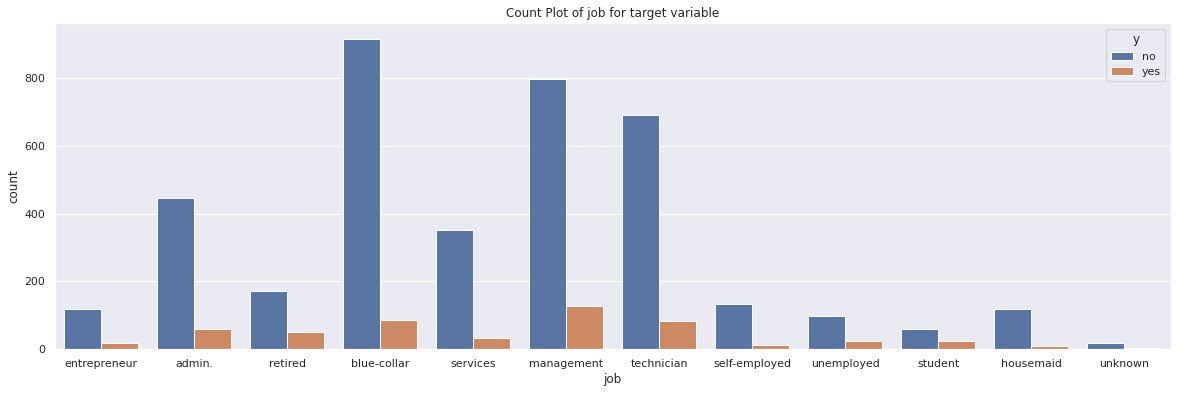

In [0]:
# Create a count plot to visualize the distribution of responses ('yes' and 'no') within each occupation.

sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=bank_sample_pd['job'], data=bank_sample_pd, hue=bank_sample_pd['y'])
plt.title('Count Plot of job for target variable')

In [0]:
# List of job categories
job_categories = ['blue-collar', 'management', 'technician', 'admin.', 'services', 'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid', 'student', 'unknown']

# Initialize an empty list to store data
data_list = []

# Iterate over each job category
for job in job_categories:
    # Count total clients for the current job
    total_clients = len(bank_sample_pd[bank_sample_pd['job'] == job])
    
    # Calculate success rate for the current job
    success_rate = bank_sample_pd[bank_sample_pd['job'] == job].y.value_counts()[1] / total_clients
    
    # Append job, total clients, and success rate to the data list
    data_list.append({'Job': job.capitalize(), 'Total Clients': total_clients, 'Success rate': success_rate})

# Create a DataFrame from the data list
df = pd.DataFrame(data_list)

# Print the DataFrame
print(df)

              Job  Total Clients  Success rate
0     Blue-collar           1001      0.085914
1      Management            925      0.139459
2      Technician            775      0.108387
3          Admin.            504      0.117063
4        Services            382      0.083770
5         Retired            225      0.231111
6   Self-employed            145      0.089655
7    Entrepreneur            137      0.138686
8      Unemployed            122      0.196721
9       Housemaid            129      0.077519
10        Student             84      0.285714
11        Unknown             23      0.173913


In [0]:
'''
Observations between 'y' and 'job':
- Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'. However, blue-collar clients has a low success rate.
- The success rate is highest for student.
'''

Out[48]: "\nObservations between 'y' and 'job':\n- Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'. However, blue-collar clients has a low success rate.\n- The success rate is highest for student.\n"

In [0]:
# Examine the correlation between target variable 'y' and 'poutcome' column
# Calculates the frequency count of unique values in the 'poutcome' column of the DataFrame.

bank_sample_pd.poutcome.value_counts()

Out[49]: unknown    3662
failure     459
other       196
success     135
Name: poutcome, dtype: int64

Out[50]: Text(0.5, 1.0, 'Count Plot of poutcome for target variable')

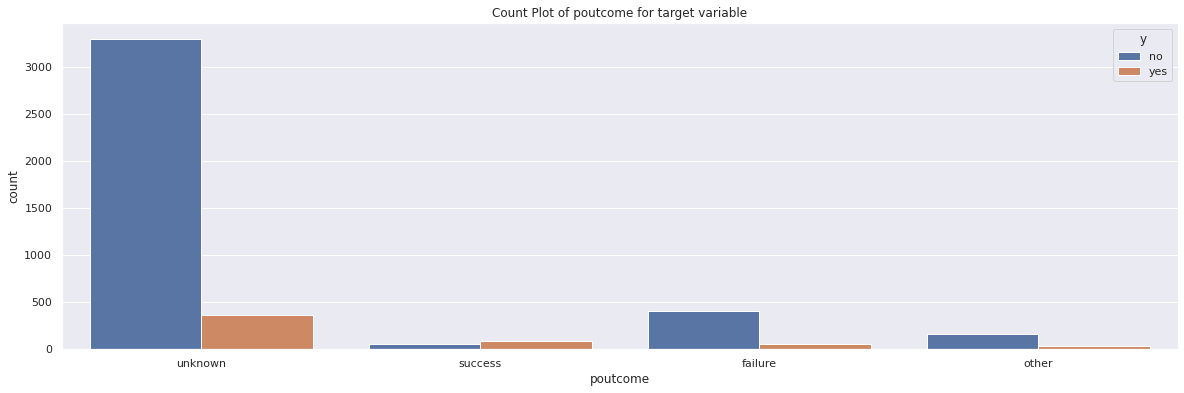

In [0]:
# Create a count plot to visualize the distribution of responses ('yes' and 'no') within each poutcomes.

sns.countplot(x=bank_sample_pd['poutcome'], data=bank_sample_pd, hue=bank_sample_pd['y'])
plt.title('Count Plot of poutcome for target variable')

In [0]:
'''
Observations between 'y' and 'poutcome':
- Most of the clients contacted have previous outcome as 'unknown' from the previous marketing campaign
'''

Out[51]: "\nObservations between 'y' and 'poutcome':\n- Most of the clients contacted have previous outcome as 'unknown' from the previous marketing campaign\n"

In [0]:
# Examine the correlation between target variable 'y' and 'education' column
# Calculates the frequency count of unique values in the 'education' column of the DataFrame.

bank_sample_pd.education.value_counts()

Out[52]: secondary    2280
tertiary     1272
primary       721
unknown       179
Name: education, dtype: int64

Out[53]: Text(0.5, 1.0, 'Count plot of education for target variable y')

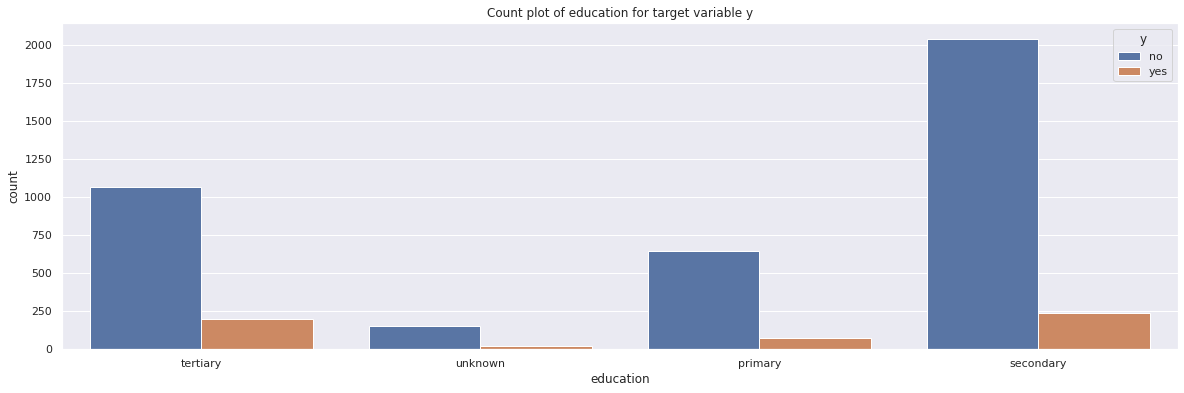

In [0]:
# Create a count plot to visualize the distribution of responses ('yes' and 'no') within each education level.

sns.countplot(x=bank_sample_pd['education'], data=bank_sample_pd, hue=bank_sample_pd['y'])
plt.title('Count plot of education for target variable y')

In [0]:
'''
Observations between 'y' and 'education':
- Most of the clients contacted have tertiary or secondary education level
'''

Out[54]: "\nObservations between 'y' and 'education':\n- Most of the clients contacted have tertiary or secondary education level\n"

In [0]:
# Examine the correlation between target variable 'y' and 'default' - credit default column
# Calculates the frequency count of unique values in the 'default' - credit default column of the DataFrame.

bank_sample_pd.default.value_counts()

Out[55]: no     4365
yes      87
Name: default, dtype: int64

Out[56]: Text(0.5, 1.0, 'Count plot of default for target variable y')

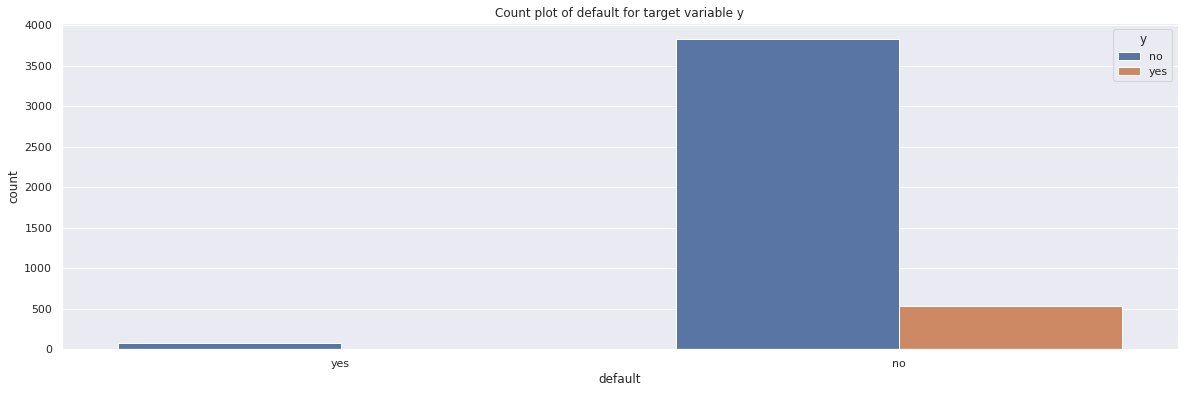

In [0]:
# Create a count plot to visualize the distribution of responses ('yes' and 'no') within each credit default .

sns.countplot(x=bank_sample_pd['default'], data=bank_sample_pd, hue=bank_sample_pd['y'])
plt.title('Count plot of default for target variable y')

In [0]:
'''
Observations between 'y' and 'default':
- Very few clients are contacted who are defaulter (87)
'''

Out[57]: "\nObservations between 'y' and 'default':\n- Very few clients are contacted who are defaulter (87)\n"

In [0]:
# Examine the correlation between target variable 'y' and 'loan'
# Calculates the frequency count of unique values in the 'loan' 

bank_sample_pd.loan.value_counts()

Out[58]: no     3742
yes     710
Name: loan, dtype: int64

Out[59]: Text(0.5, 1.0, 'Count plot of loan for target variable y')

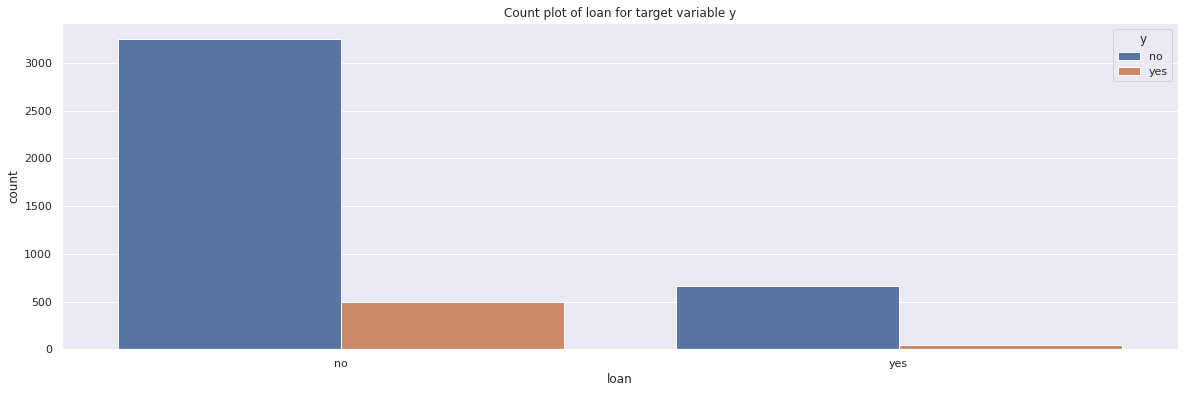

In [0]:
# Create a count plot to visualize the distribution of responses ('yes' and 'no') within each loan

sns.countplot(x=bank_sample_pd['loan'], data=bank_sample_pd, hue=bank_sample_pd['y'])
plt.title('Count plot of loan for target variable y')

In [0]:
'''
Observations between 'y' and 'loan':
- Most successful clients do not have a loan. Only a small percentage of contacted clients who already have a loan are successful.
'''

Out[60]: "\nObservations between 'y' and 'loan':\n- Most successful clients do not have a loan. Only a small percentage of contacted clients who already have a loan are successful.\n"

In [0]:
# Examine the correlation between target variable 'y' and 'contact' 
# Calculates the frequency count of unique values in the 'contact'

bank_sample_pd.contact.value_counts()

Out[61]: cellular     2817
unknown      1393
telephone     242
Name: contact, dtype: int64

Out[62]: Text(0.5, 1.0, 'Count plot of contact for target variable y')

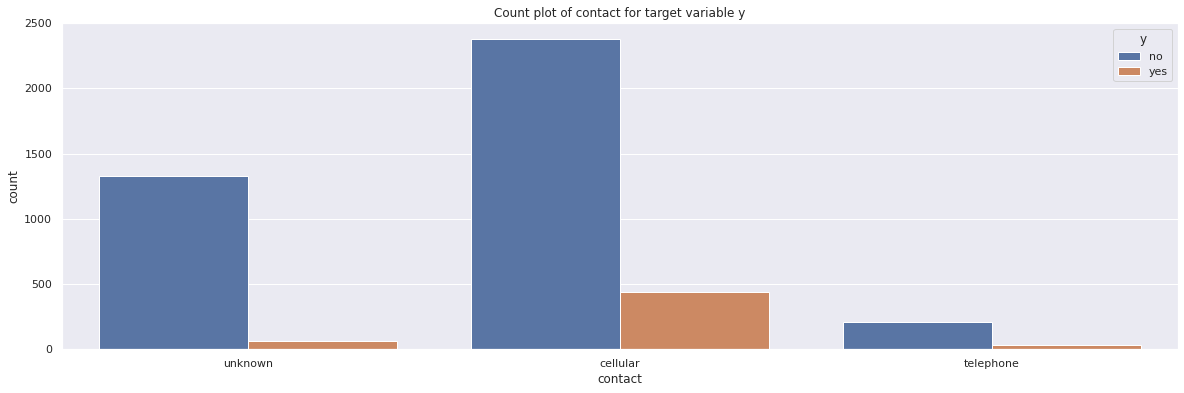

In [0]:
# Create a count plot to visualize the distribution of responses ('yes' and 'no') within each categories in contact

sns.countplot(x=bank_sample_pd['contact'], data=bank_sample_pd, hue=bank_sample_pd['y'])
plt.title('Count plot of contact for target variable y')

In [0]:
'''
Observations between 'y' and 'contact':
- Most of the people are contacted through cellular.
'''

Out[63]: "\nObservations between 'y' and 'contact':\n- Most of the people are contacted through cellular.\n"

In [0]:
# Examine the correlation between target variable 'y' and 'month' 
# Calculates the frequency count of unique values in the 'month'

bank_sample_pd.month.value_counts() 

Out[64]: may    1409
jul     663
aug     561
jun     543
nov     403
apr     301
feb     233
jan     142
oct      78
sep      56
mar      43
dec      20
Name: month, dtype: int64

Out[65]: Text(0.5, 1.0, 'Count plot of month for target variable y')

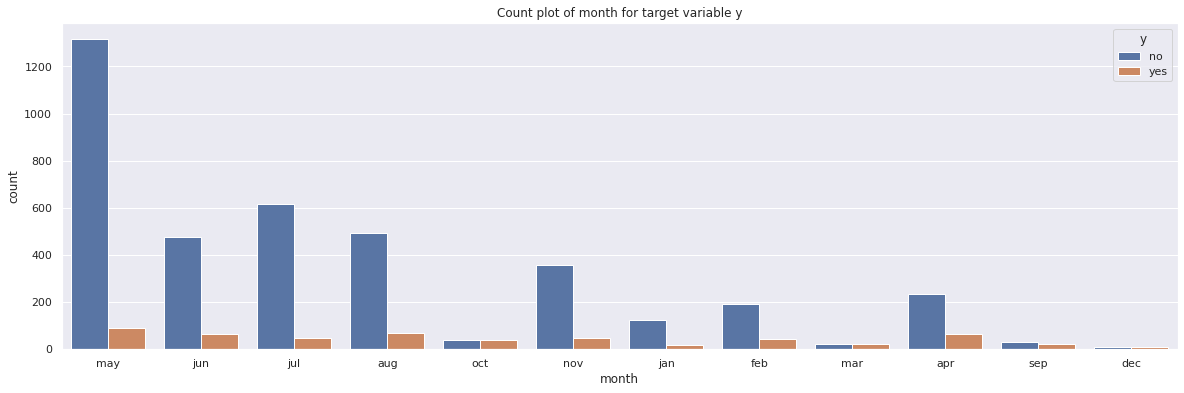

In [0]:
# Create a count plot to visualize the distribution of responses ('yes' and 'no') within each month

sns.countplot(x=bank_sample_pd['month'], data=bank_sample_pd, hue=bank_sample_pd['y'])
plt.title('Count plot of month for target variable y')

In [0]:
# Calculate success rates by month:
# This loop iterates over each month and computes the number of clients contacted and their success rate.

results = []  # Initialize an empty list to store results

for month in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']:
    # Calculate the number of clients contacted in the current month
    clients_contacted = len(bank_sample_pd[bank_sample_pd['month'] == month])
    
    # Calculate the success rate for the current month
    success_rate = bank_sample_pd[bank_sample_pd['month'] == month].y.value_counts()[1] / clients_contacted
    
    # Append the results for the current month as a dictionary to the 'results' list
    results.append({'Month': month.capitalize(), 'Clients Contacted': clients_contacted, 'Success Rate': success_rate})

# Create a DataFrame from the list of dictionaries and print it
month_df = pd.DataFrame(results)
print(month_df)

   Month  Clients Contacted  Success Rate
0    Jan                142      0.119718
1    Feb                233      0.180258
2    Mar                 43      0.488372
3    Apr                301      0.215947
4    May               1409      0.064585
5    Jun                543      0.123389
6    Jul                663      0.070890
7    Aug                561      0.121212
8    Sep                 56      0.428571
9    Oct                 78      0.487179
10   Nov                403      0.116625
11   Dec                 20      0.450000


In [0]:
'''
Observations between 'y' and 'month':
- Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.
- March have highest success rate but is one of the least clients contacted month
'''

Out[67]: "\nObservations between 'y' and 'month':\n- Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.\n- March have highest success rate but is one of the least clients contacted month\n"

### 2.2.3 CREATE A PAIRPLOT BETWEEN NUMBERICAL VARIABLES

Out[68]: <seaborn.axisgrid.PairGrid at 0x7f01b0c75100>

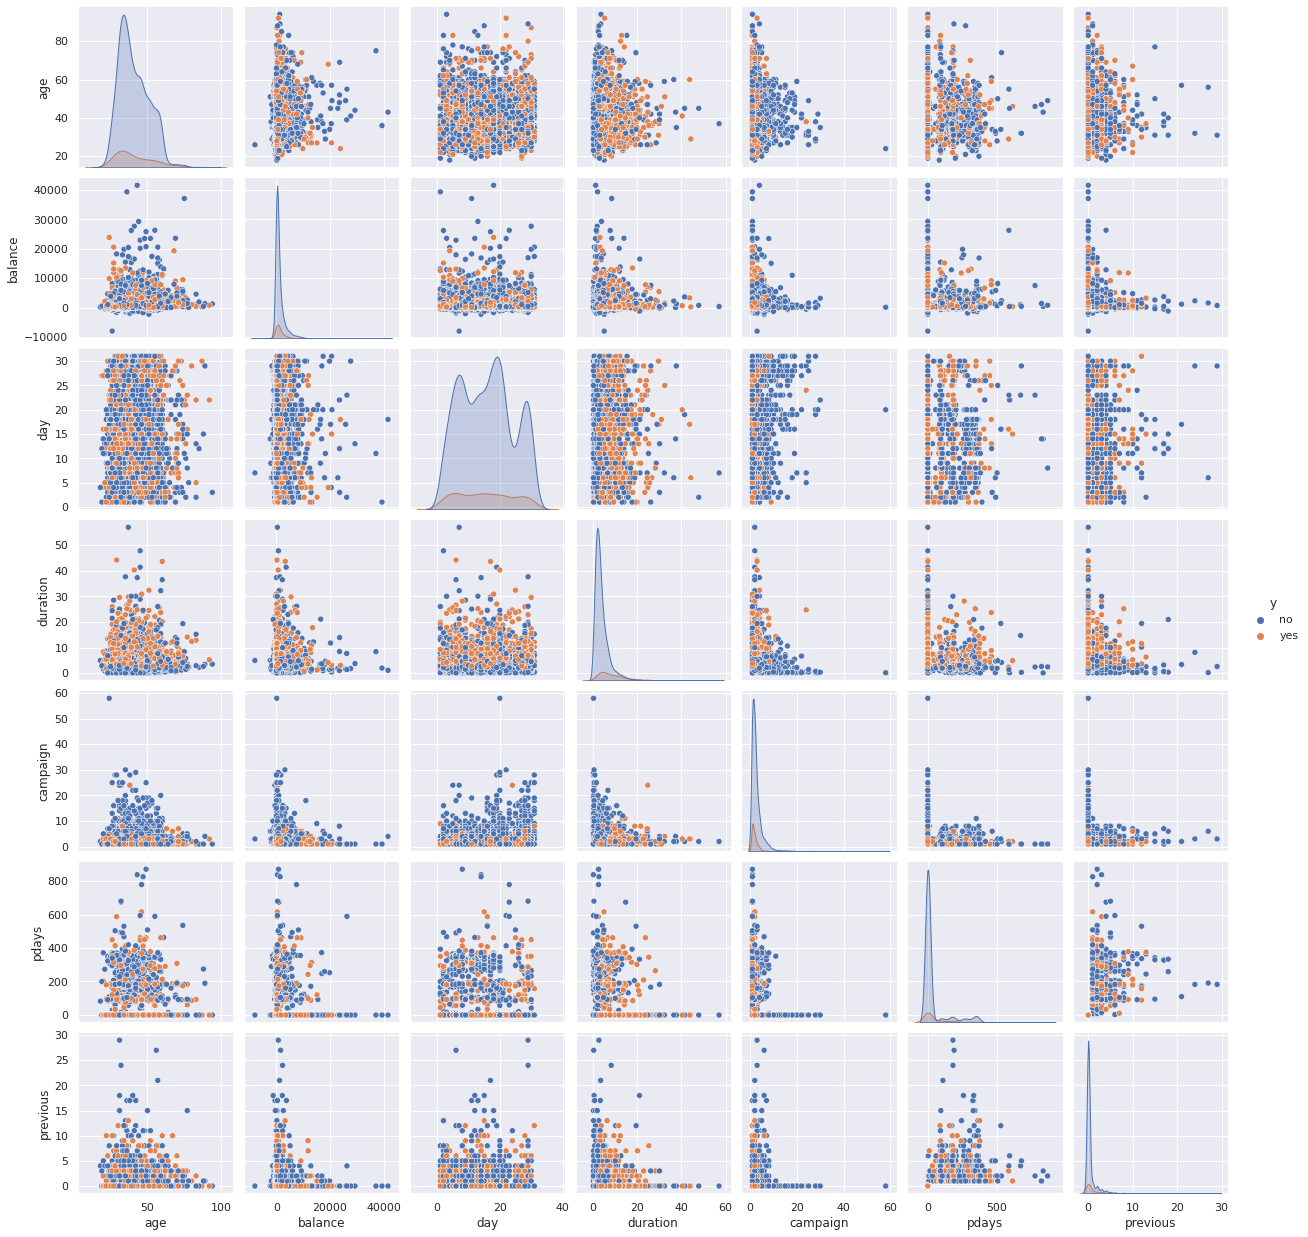

In [0]:
bank_sample_pd.drop('age_group', axis=1, inplace=True)
sns.pairplot(bank_sample_pd, hue='y')

In [0]:
'''
The pair plots for most variables exhibit significant overlap. 
However, the plots for age-campaign and day-campaign demonstrate better separation between different classes, with minimal overlap.
'''

Out[69]: '\nThe pair plots for most variables exhibit significant overlap. \nHowever, the plots for age-campaign and day-campaign demonstrate better separation between different classes, with minimal overlap.\n'

### 2.2.4 CREATE A CORRELATION MATRIX OF NUMBERICAL VARIABLES

In [0]:
bank_sample_pd['y'] = bank_sample_pd['y'].map({'yes': 1, 'no': 0})

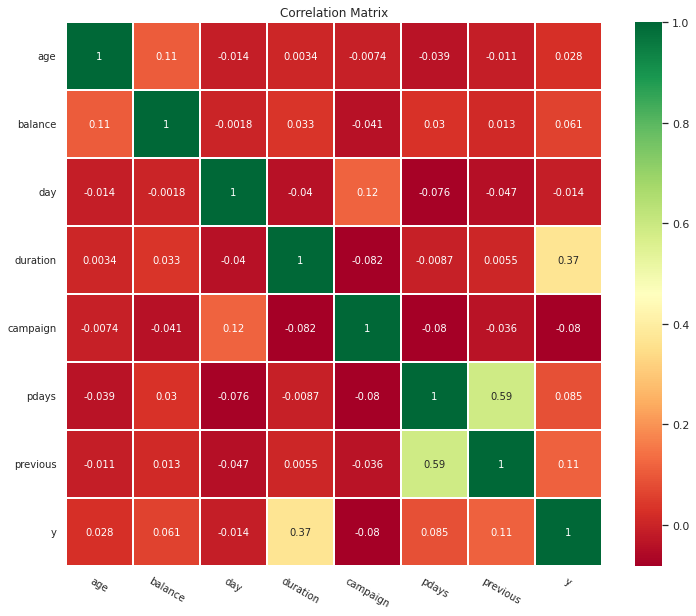

In [0]:
corr_data = bank_sample_pd[numerical + ['y']]
corr = corr_data.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [0]:
"""
Observation:
- Overall, numerical features have very less correlation between them.
- 'pdays' and 'previous' has the highest correlation
- 'duration' have a higher correlation with target variable
"""

Out[72]: "\nObservation:\n- Overall, numerical features have very less correlation between them.\n- 'pdays' and 'previous' has the highest correlation\n- 'duration' have a higher correlation with target variable\n"


## PART 3: DATA PROCESSING
In this step, I address any data quality issues identified during the data understanding phase. This involves:

- Outliers treatment
- Encoding categorical variables
- Split train/test set
- Balancing training set
- Additionally, I may explore feature selection techniques to create new meaningful features that enhance the model's predictive capabilities. However, within this exercise, I will skip this step and go with the whole dataset for experiment


### 3.1. OUTLINERS TREATMENT
- Detect the outlier with IQR
- Push the outlier back to boundaries based on IQR

In [0]:
# Detect outliner in each column of the dataset
# Compute the IQR for each column
Q1 = bank_sample_pd.quantile(0.25)
Q3 = bank_sample_pd.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Find outliers for each column
outliers = ((bank_sample_pd < (Q1 - threshold * IQR)) | (bank_sample_pd > (Q3 + threshold * IQR))).sum()

# Display the number of outliers in each column
print("Number of outliers in each column:")
print(outliers)


Number of outliers in each column:
age           47
balance      445
campaign     280
contact        0
day            0
default        0
duration     341
education      0
housing        0
job            0
loan           0
marital        0
month          0
pdays        790
poutcome       0
previous     790
y            536
dtype: int64


<command-3714734851629164>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((bank_sample_pd < (Q1 - threshold * IQR)) | (bank_sample_pd > (Q3 + threshold * IQR))).sum()


In [0]:
# Push the outliers to the IQR boundaries

def cap_outliers_iqr(df, column):
    """
    Cap outliers in a DataFrame column using the Interquartile Range (IQR) method.
    
    Parameters:
        df (DataFrame): Input DataFrame.
        column (str): Column name.
    
    Returns:
        DataFrame: DataFrame with outliers capped using IQR.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Specify the columns to cap outliers using IQR
columns_to_cap_iqr = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Apply cap_outliers_iqr function to each column
for column in columns_to_cap_iqr:
    bank_sample_pd_out = cap_outliers_iqr(bank_sample_pd, column)


In [0]:
bank_sample_pd_out.describe(include='all')

age 
 job 
 marital 
 education 
 default 
 balance 
 housing 
 loan 
 contact 
 day 
 month 
 duration 
 campaign 
 pdays 
 previous 
 poutcome 
 y 
 
 
 
 
 count 
 4452.000000 
 4452 
 4452 
 4452 
 4452 
 4452.000000 
 4452 
 4452 
 4452 
 4452.000000 
 4452 
 4452.000000 
 4452.000000 
 4452.0 
 4452.0 
 4452 
 4452.000000 
 
 
 unique 
 NaN 
 12 
 3 
 4 
 2 
 NaN 
 2 
 2 
 3 
 NaN 
 12 
 NaN 
 NaN 
 NaN 
 NaN 
 4 
 NaN 
 
 
 top 
 NaN 
 blue-collar 
 married 
 secondary 
 no 
 NaN 
 yes 
 no 
 cellular 
 NaN 
 may 
 NaN 
 NaN 
 NaN 
 NaN 
 unknown 
 NaN 
 
 
 freq 
 NaN 
 1001 
 2678 
 2280 
 4365 
 NaN 
 2533 
 3742 
 2817 
 NaN 
 1409 
 NaN 
 NaN 
 NaN 
 NaN 
 3662 
 NaN 
 
 
 mean 
 40.757525 
 NaN 
 NaN 
 NaN 
 NaN 
 927.545485 
 NaN 
 NaN 
 NaN 
 15.766173 
 NaN 
 3.958824 
 2.336927 
 -1.0 
 0.0 
 NaN 
 0.120395 
 
 
 std 
 10.448814 
 NaN 
 NaN 
 NaN 
 NaN 
 1163.652118 
 NaN 
 NaN 
 NaN 
 8.343631 
 NaN 
 3.004210 
 1.553553 
 0.0 
 0.0 
 NaN 
 0.325460 
 
 
 min 
 18.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 -1948.500000 
 NaN 
 NaN 
 NaN 
 1.000000 
 NaN 
 0.050000 
 1.000000 
 -1.0 
 0.0 
 NaN 
 0.000000 
 
 
 25% 
 33.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 75.000000 
 NaN 
 NaN 
 NaN 
 8.000000 
 NaN 
 1.750000 
 1.000000 
 -1.0 
 0.0 
 NaN 
 0.000000 
 
 
 50% 
 39.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 443.000000 
 NaN 
 NaN 
 NaN 
 16.000000 
 NaN 
 3.033333 
 2.000000 
 -1.0 
 0.0 
 NaN 
 0.000000 
 
 
 75% 
 48.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 1424.000000 
 NaN 
 NaN 
 NaN 
 21.000000 
 NaN 
 5.383333 
 3.000000 
 -1.0 
 0.0 
 NaN 
 0.000000 
 
 
 max 
 70.500000 
 NaN 
 NaN 
 NaN 
 NaN 
 3447.500000 
 NaN 
 NaN 
 NaN 
 31.000000 
 NaN 
 10.833333 
 6.000000 
 -1.0 
 0.0 
 NaN 
 1.000000

In [0]:
df_final = bank_sample_pd_out

In [0]:
df_final

age 
 job 
 marital 
 education 
 default 
 balance 
 housing 
 loan 
 contact 
 day 
 month 
 duration 
 campaign 
 pdays 
 previous 
 poutcome 
 y 
 
 
 
 
 0 
 42.0 
 entrepreneur 
 divorced 
 tertiary 
 yes 
 2.0 
 yes 
 no 
 unknown 
 5 
 may 
 6.333333 
 1.0 
 -1.0 
 0.0 
 unknown 
 0 
 
 
 1 
 45.0 
 admin. 
 single 
 unknown 
 no 
 13.0 
 yes 
 no 
 unknown 
 5 
 may 
 1.633333 
 1.0 
 -1.0 
 0.0 
 unknown 
 0 
 
 
 2 
 60.0 
 retired 
 married 
 primary 
 no 
 60.0 
 yes 
 no 
 unknown 
 5 
 may 
 3.650000 
 1.0 
 -1.0 
 0.0 
 unknown 
 0 
 
 
 3 
 54.0 
 blue-collar 
 married 
 secondary 
 no 
 1291.0 
 yes 
 no 
 unknown 
 5 
 may 
 4.433333 
 1.0 
 -1.0 
 0.0 
 unknown 
 0 
 
 
 4 
 40.0 
 blue-collar 
 single 
 unknown 
 no 
 24.0 
 yes 
 no 
 unknown 
 5 
 may 
 3.083333 
 1.0 
 -1.0 
 0.0 
 unknown 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 4447 
 28.0 
 self-employed 
 single 
 tertiary 
 no 
 159.0 
 no 
 no 
 cellular 
 16 
 nov 
 7.483333 
 2.0 
 -1.0 
 0.0 
 success 
 1 
 
 
 4448 
 34.0 
 blue-collar 
 single 
 secondary 
 no 
 1475.0 
 yes 
 no 
 cellular 
 16 
 nov 
 10.833333 
 3.0 
 -1.0 
 0.0 
 other 
 0 
 
 
 4449 
 34.0 
 admin. 
 single 
 secondary 
 no 
 557.0 
 no 
 no 
 cellular 
 17 
 nov 
 3.733333 
 1.0 
 -1.0 
 0.0 
 unknown 
 1 
 
 
 4450 
 51.0 
 technician 
 married 
 tertiary 
 no 
 825.0 
 no 
 no 
 cellular 
 17 
 nov 
 10.833333 
 3.0 
 -1.0 
 0.0 
 unknown 
 1 
 
 
 4451 
 70.5 
 retired 
 divorced 
 primary 
 no 
 1729.0 
 no 
 no 
 cellular 
 17 
 nov 
 7.600000 
 2.0 
 -1.0 
 0.0 
 unknown 
 1 
 
 
 
 4452 rows × 17 columns


### 3.2. ENCODING CATEGORICAL VARIABLES

In [0]:
# Identify categorical columns
categorical_columns = categorical 

# Apply one-hot encoding to categorical columns
encoded_columns = pd.get_dummies(df_final[categorical_columns], prefix=categorical_columns)

# Drop the original categorical columns from the DataFrame
df_final = df_final.drop(columns=categorical_columns)

# Concatenate the original DataFrame with the encoded columns
df_final = pd.concat([df_final, encoded_columns], axis=1)
df_final

age 
 balance 
 day 
 duration 
 campaign 
 pdays 
 previous 
 y 
 job_admin. 
 job_blue-collar 
 ... 
 month_jun 
 month_mar 
 month_may 
 month_nov 
 month_oct 
 month_sep 
 poutcome_failure 
 poutcome_other 
 poutcome_success 
 poutcome_unknown 
 
 
 
 
 0 
 42.0 
 2.0 
 5 
 6.333333 
 1.0 
 -1.0 
 0.0 
 0 
 0 
 0 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 1 
 45.0 
 13.0 
 5 
 1.633333 
 1.0 
 -1.0 
 0.0 
 0 
 1 
 0 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 60.0 
 60.0 
 5 
 3.650000 
 1.0 
 -1.0 
 0.0 
 0 
 0 
 0 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 3 
 54.0 
 1291.0 
 5 
 4.433333 
 1.0 
 -1.0 
 0.0 
 0 
 0 
 1 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 4 
 40.0 
 24.0 
 5 
 3.083333 
 1.0 
 -1.0 
 0.0 
 0 
 0 
 1 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 4447 
 28.0 
 159.0 
 16 
 7.483333 
 2.0 
 -1.0 
 0.0 
 1 
 0 
 0 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 4448 
 34.0 
 1475.0 
 16 
 10.833333 
 3.0 
 -1.0 
 0.0 
 0 
 0 
 1 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 
 
 4449 
 34.0 
 557.0 
 17 
 3.733333 
 1.0 
 -1.0 
 0.0 
 1 
 1 
 0 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 4450 
 51.0 
 825.0 
 17 
 10.833333 
 3.0 
 -1.0 
 0.0 
 1 
 0 
 0 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 4451 
 70.5 
 1729.0 
 17 
 7.600000 
 2.0 
 -1.0 
 0.0 
 1 
 0 
 0 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 
 4452 rows × 52 columns


### 3.3. TRAIN/TEST SPLIT

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score,accuracy_score, precision_score, recall_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE as ImbSMOTE
from sklearn.feature_selection import RFE
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.naive_bayes import GaussianNB

     |████████████████████████████████| 257 kB 5.2 MB/s 
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-b0065e9c-5ca5-4acc-b020-3c067ba54b5a/bin/python -m pip install --upgrade pip' command.


In [0]:
#Train/Test split on a 80: 20 ratio
X = df_final.drop(columns=["y"])
y = df_final["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Check the percentage of "pass/fail" in the original data and the training/testing sets
print("Original data:")
print(y.value_counts(normalize=True))
print("Training data:")
print(y_train.value_counts(normalize=True))
print("Test data:")
print(y_test.value_counts(normalize=True))

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Original data:
0    0.879605
1    0.120395
Name: y, dtype: float64
Training data:
0    0.879528
1    0.120472
Name: y, dtype: float64
Test data:
0    0.87991
1    0.12009
Name: y, dtype: float64
Training set size: 3561
Test set size: 891


In [0]:
# Concatenating the feature matrix (X_train) and the target variable (y_train) along the columns
df_training = pd.concat([X_train,y_train], axis=1)
df_training

age 
 balance 
 day 
 duration 
 campaign 
 pdays 
 previous 
 job_admin. 
 job_blue-collar 
 job_entrepreneur 
 ... 
 month_mar 
 month_may 
 month_nov 
 month_oct 
 month_sep 
 poutcome_failure 
 poutcome_other 
 poutcome_success 
 poutcome_unknown 
 y 
 
 
 
 
 4436 
 49.0 
 780.0 
 8 
 2.466667 
 1.0 
 -1.0 
 0.0 
 0 
 0 
 0 
 ... 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 
 
 436 
 51.0 
 3447.5 
 19 
 5.300000 
 1.0 
 -1.0 
 0.0 
 0 
 0 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 2502 
 58.0 
 63.0 
 18 
 8.483333 
 1.0 
 -1.0 
 0.0 
 0 
 0 
 0 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3814 
 38.0 
 226.0 
 15 
 2.783333 
 4.0 
 -1.0 
 0.0 
 0 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 4366 
 37.0 
 341.0 
 13 
 4.783333 
 3.0 
 -1.0 
 0.0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1024 
 57.0 
 1114.0 
 6 
 2.316667 
 2.0 
 -1.0 
 0.0 
 0 
 0 
 1 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 2340 
 50.0 
 60.0 
 27 
 2.516667 
 6.0 
 -1.0 
 0.0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 4252 
 40.0 
 3447.5 
 13 
 3.633333 
 2.0 
 -1.0 
 0.0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 
 
 1162 
 39.0 
 2600.0 
 17 
 1.283333 
 1.0 
 -1.0 
 0.0 
 1 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 217 
 39.0 
 105.0 
 9 
 4.900000 
 2.0 
 -1.0 
 0.0 
 0 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 
 3561 rows × 52 columns


### 3.4. BALANCING THE TRAINING SET WITH ROSE

In [0]:
# Balancing - ROSE
# Define x & y
X = df_training.drop(columns=["y"])
y = df_training["y"]

# Define desired sampling strategy / parameters
rose = RandomOverSampler(sampling_strategy='auto', random_state = 11)

# Fit
Rose_X, Rose_y = rose.fit_resample(X, y)

# Join X and y to see the "Label" ratio in the balanced dataset
training_final = pd.concat([Rose_X, Rose_y], axis=1)
balancing_ratio = training_final['y'].value_counts(normalize=True)* 100
print(balancing_ratio)

0    50.0
1    50.0
Name: y, dtype: float64



## PART 4: MODELLING

In [0]:
# Define the model evaluation function

def evaluate_model(model, X_train, y_train, X_test, y_test):

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate precision score
    precision = precision_score(y_test, y_pred)

    # Calculate recall score
    recall = recall_score(y_test, y_pred)

    # Calculate true negatives (TN)
    TN = cm[0, 0]

    # Calculate false positives (FP)
    FP = cm[0, 1]

    # Calculate false negatives (FN)
    FN = cm[1, 0]

    # Calculate true positives (TP)
    TP = cm[1, 1]

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    # Calculate F2 score
    f2 = fbeta_score(y_test, y_pred, beta=2)

    # Calculate AUC score
    auc = roc_auc_score(y_test, y_pred)

    # Generate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', center=0.5)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    # Set x-axis and y-axis tick labels
    plt.xticks([0.5, 1.5], ['Pass', 'Fail'])
    plt.yticks([0.5, 1.5], ['Pass', 'Fail'])

    plt.show()

    # Return evaluation results
    evaluation_results = {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'F2 Score': f2,
        'AUC Score': auc,
        'TN': TN,
        'FP': FP,
        'FN': FN,
        'TP': TP
    }
    print(evaluation_results)


### 4.1 BUILD BASELINE MODEL

In [0]:
# Build the baseline - logistics regression model
# Define variables
X_train = training_final.drop(['y'], axis=1)
y_train = training_final['y']

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/databricks/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/databricks/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


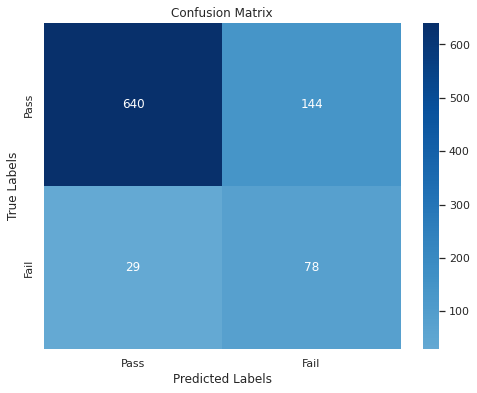

{'Accuracy': 0.8058361391694725, 'Confusion Matrix': array([[640, 144],
       [ 29,  78]]), 'Precision': 0.35135135135135137, 'Recall': 0.7289719626168224, 'F1 Score': 0.4741641337386018, 'F2 Score': 0.6, 'AUC Score': 0.7726492466145336, 'TN': 640, 'FP': 144, 'FN': 29, 'TP': 78}


In [0]:
# Evaluate the baseline model
evaluate_model(LogisticRegression(), X_train, y_train, X_test, y_test)

In [0]:
'''
The model exhibits reasonably good accuracy (80%).
The AUC score is approximately 77.26%. This indicates that the model's ability to distinguish between positive and negative instances is relatively good.
While the model demonstrates reasonable overall accuracy and discriminative ability (as indicated by the AUC score), there are notable weaknesses in terms of precision and F1 score, suggesting that the model may struggle with false positive predictions
'''

Out[86]: "\nThe model exhibits reasonably good accuracy (80%).\nThe AUC score is approximately 77.26%. This indicates that the model's ability to distinguish between positive and negative instances is relatively good.\nWhile the model demonstrates reasonable overall accuracy and discriminative ability (as indicated by the AUC score), there are notable weaknesses in terms of precision and F1 score, suggesting that the model may struggle with false positive predictions\n"

In [0]:
# Create an array with different models
models = [
    SVC(),
    MLPClassifier(random_state=1, max_iter=300),
    AdaBoostClassifier(n_estimators=2000),
    KNeighborsClassifier(n_neighbors=10),
    RandomForestClassifier(n_estimators=100, max_features='log2'),
    DecisionTreeClassifier(max_depth=10),
    GaussianProcessClassifier(),
    GradientBoostingClassifier(n_estimators=2000),
    HistGradientBoostingClassifier(max_iter=100),
    GaussianNB(),
]

Model: SVC


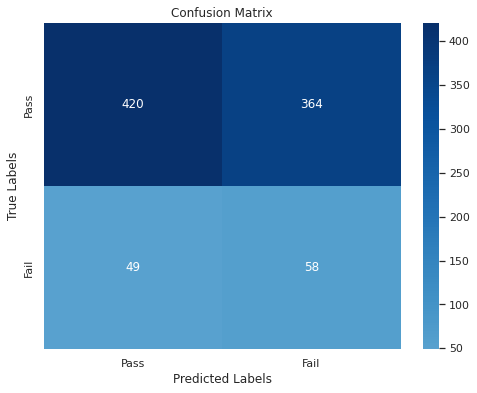

{'Accuracy': 0.5364758698092031, 'Confusion Matrix': array([[420, 364],
       [ 49,  58]]), 'Precision': 0.13744075829383887, 'Recall': 0.5420560747663551, 'F1 Score': 0.21928166351606806, 'F2 Score': 0.34117647058823525, 'AUC Score': 0.5388851802403204, 'TN': 420, 'FP': 364, 'FN': 49, 'TP': 58}


Model: MLPClassifier


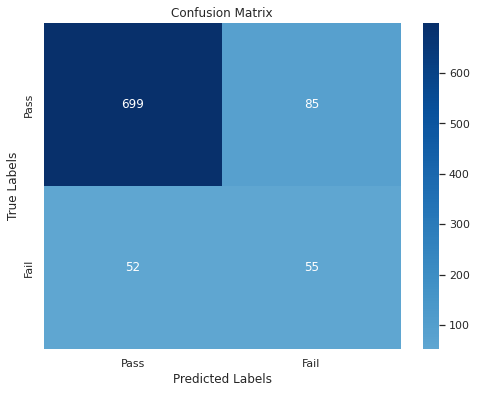

{'Accuracy': 0.8462401795735129, 'Confusion Matrix': array([[699,  85],
       [ 52,  55]]), 'Precision': 0.39285714285714285, 'Recall': 0.514018691588785, 'F1 Score': 0.44534412955465585, 'F2 Score': 0.48415492957746464, 'AUC Score': 0.7028001621209231, 'TN': 699, 'FP': 85, 'FN': 52, 'TP': 55}


Model: AdaBoostClassifier


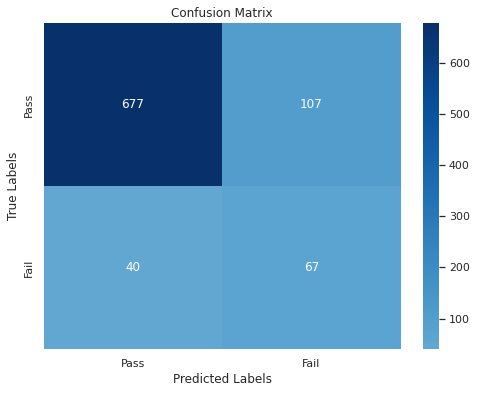

{'Accuracy': 0.835016835016835, 'Confusion Matrix': array([[677, 107],
       [ 40,  67]]), 'Precision': 0.3850574712643678, 'Recall': 0.6261682242990654, 'F1 Score': 0.4768683274021352, 'F2 Score': 0.5564784053156147, 'AUC Score': 0.7448443162311653, 'TN': 677, 'FP': 107, 'FN': 40, 'TP': 67}


Model: KNeighborsClassifier


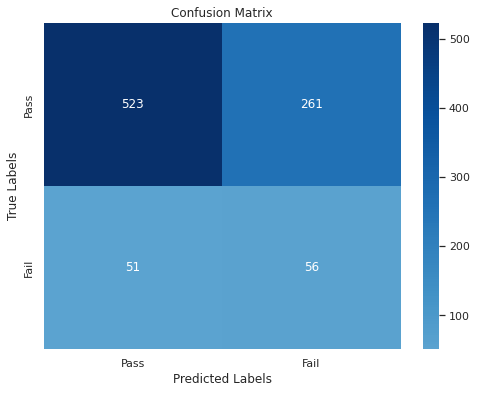

{'Accuracy': 0.6498316498316499, 'Confusion Matrix': array([[523, 261],
       [ 51,  56]]), 'Precision': 0.17665615141955837, 'Recall': 0.5233644859813084, 'F1 Score': 0.2641509433962264, 'F2 Score': 0.3758389261744966, 'AUC Score': 0.5952281613580012, 'TN': 523, 'FP': 261, 'FN': 51, 'TP': 56}


Model: RandomForestClassifier


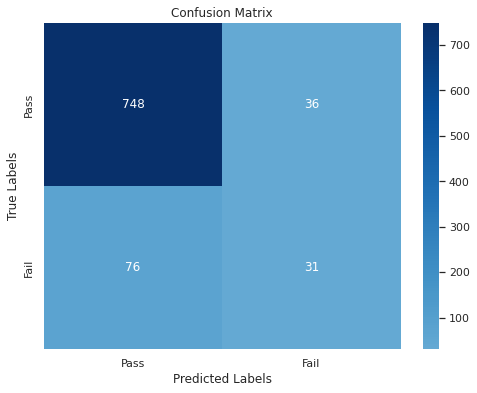

{'Accuracy': 0.8742985409652076, 'Confusion Matrix': array([[748,  36],
       [ 76,  31]]), 'Precision': 0.4626865671641791, 'Recall': 0.2897196261682243, 'F1 Score': 0.3563218390804598, 'F2 Score': 0.31313131313131315, 'AUC Score': 0.6219006294106427, 'TN': 748, 'FP': 36, 'FN': 76, 'TP': 31}


Model: DecisionTreeClassifier


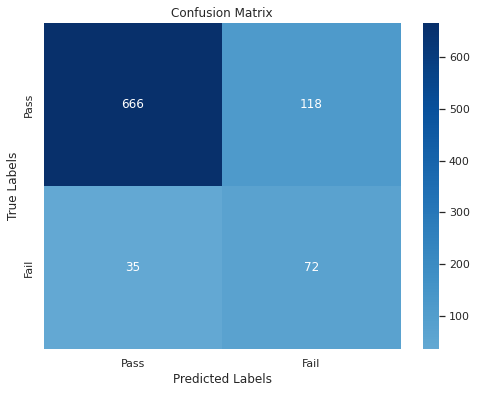

{'Accuracy': 0.8282828282828283, 'Confusion Matrix': array([[666, 118],
       [ 35,  72]]), 'Precision': 0.37894736842105264, 'Recall': 0.6728971962616822, 'F1 Score': 0.4848484848484849, 'F2 Score': 0.5825242718446603, 'AUC Score': 0.7611934960900248, 'TN': 666, 'FP': 118, 'FN': 35, 'TP': 72}


Model: GaussianProcessClassifier


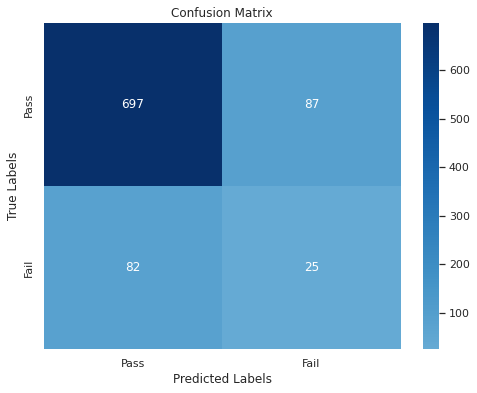

{'Accuracy': 0.8103254769921436, 'Confusion Matrix': array([[697,  87],
       [ 82,  25]]), 'Precision': 0.22321428571428573, 'Recall': 0.2336448598130841, 'F1 Score': 0.228310502283105, 'F2 Score': 0.23148148148148145, 'AUC Score': 0.561337736028991, 'TN': 697, 'FP': 87, 'FN': 82, 'TP': 25}


Model: GradientBoostingClassifier


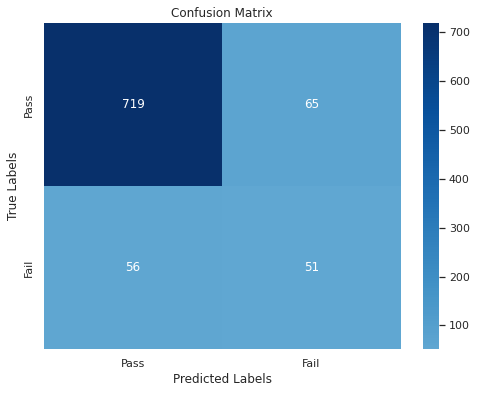

{'Accuracy': 0.8641975308641975, 'Confusion Matrix': array([[719,  65],
       [ 56,  51]]), 'Precision': 0.4396551724137931, 'Recall': 0.4766355140186916, 'F1 Score': 0.45739910313901344, 'F2 Score': 0.4687499999999999, 'AUC Score': 0.6968636753766927, 'TN': 719, 'FP': 65, 'FN': 56, 'TP': 51}


Model: HistGradientBoostingClassifier


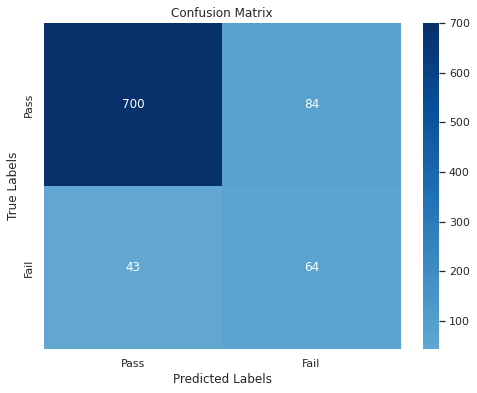

{'Accuracy': 0.8574635241301908, 'Confusion Matrix': array([[700,  84],
       [ 43,  64]]), 'Precision': 0.43243243243243246, 'Recall': 0.5981308411214953, 'F1 Score': 0.5019607843137254, 'F2 Score': 0.5555555555555556, 'AUC Score': 0.7454939919893191, 'TN': 700, 'FP': 84, 'FN': 43, 'TP': 64}


Model: GaussianNB


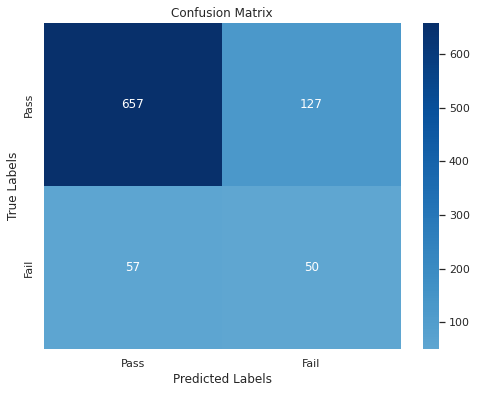

{'Accuracy': 0.7934904601571269, 'Confusion Matrix': array([[657, 127],
       [ 57,  50]]), 'Precision': 0.2824858757062147, 'Recall': 0.4672897196261682, 'F1 Score': 0.35211267605633806, 'F2 Score': 0.4132231404958678, 'AUC Score': 0.6526499618539005, 'TN': 657, 'FP': 127, 'FN': 57, 'TP': 50}




In [0]:
# Fit the model with the test set and evaluate each model
for model in models:
    # Display the name of the current model being evaluated
    print("Model:", model.__class__.__name__)
    
    # Train the model on the training set
    model.fit(X_train, y_train) 
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate and print the performance metrics of the model
    evaluate_model(model, X_train, y_train, X_test, y_test)
    
    # Print a separator for better readability
    print("\n" + "="*50 + "\n")

In [0]:
# Compare models based on accuracy and AUC before hyperparameter tuning
accuracy_scores = []  # List to store accuracy scores for each model
auc_scores = []       # List to store AUC scores for each model

# Iterate through each model in the list
for model in models:
    y_pred = model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append((model.__class__.__name__, accuracy))

    # Evaluate AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
        auc_score = roc_auc_score(y_test, y_prob)
        auc_scores.append((model.__class__.__name__, auc_score))

# Print and compare accuracy and AUC scores
print("\nModel Comparison:")
print("Accuracy Scores:")
for model_name, accuracy in accuracy_scores:
    print(f"{model_name}: {accuracy}")

print("\nAUC Scores:")
for model_name, auc_score in auc_scores:
    print(f"{model_name}: {auc_score}")


Model Comparison:
Accuracy Scores:
SVC: 0.5364758698092031
MLPClassifier: 0.8462401795735129
AdaBoostClassifier: 0.835016835016835
KNeighborsClassifier: 0.6498316498316499
RandomForestClassifier: 0.8742985409652076
DecisionTreeClassifier: 0.8282828282828283
GaussianProcessClassifier: 0.8103254769921436
GradientBoostingClassifier: 0.8641975308641975
HistGradientBoostingClassifier: 0.8574635241301908
GaussianNB: 0.7934904601571269

AUC Scores:
MLPClassifier: 0.8393453175662788
AdaBoostClassifier: 0.8184364867442304
KNeighborsClassifier: 0.6281947358382605
RandomForestClassifier: 0.868795298493229
DecisionTreeClassifier: 0.7706406160595078
GaussianProcessClassifier: 0.5545370017165745
GradientBoostingClassifier: 0.8586806217814228
HistGradientBoostingClassifier: 0.8744039671943544
GaussianNB: 0.7566994087354567


In [0]:
'''
Among the models, Random Forest and Decision Tree perform quite well in terms of accuracy and AUC score, so I will use these two models along with Logistic Regression for fine-tuning. 
'''

Out[90]: '\nAmong the models, Random Forest and Decision Tree perform quite well in terms of accuracy and AUC score, so I will use these two models along with Logistic Regression for fine-tuning. \n'


### 4.2 FINE-TUNING MODELS

In [0]:
# Logistic Regression hyperparameter combinations
logistic_regression_params = [
    (0.1, 'liblinear'),
    (1.0, 'liblinear'),
    (10.0, 'liblinear'),
    (0.1, 'lbfgs'),
    (1.0, 'lbfgs'),
    (10.0, 'lbfgs'),
    (0.1, 'sag'),
    (1.0, 'sag'),
    (10.0, 'sag'),
    (0.1, 'saga')
]

In [0]:
# Fine-tuning, evaluate and conclude the best combination of Logistics Regression

log_best_accuracy = -1 
log_best_auc = -1
log_best_model = None
log_best_hyperparameters = None

for C, solver in logistic_regression_params:
    model = LogisticRegression(C=C, solver=solver)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    if accuracy > log_best_accuracy:
        log_best_accuracy = accuracy
        log_best_auc = auc
        log_best_model = model
        log_best_hyperparameters = (C, solver)

print("Best hyperparameters:", log_best_hyperparameters)
print("Best accuracy:", log_best_accuracy)
print("Best AUC:", log_best_auc)
print("Best model:", log_best_model)

/databricks/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/databricks/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Best hyperparameters: (0.1, 'liblinear')
Best accuracy: 0.8170594837261503
Best AUC: 0.7911322239176044
Best model: LogisticRegression(C=0.1, solver='liblinear')


/databricks/python/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [0]:
# Decision Tree hyperparameter combinations
decision_tree_params = [
    (3, 'gini'),
    (5, 'gini'),
    (7, 'gini'),
    (3, 'entropy'),
    (5, 'entropy'),
    (7, 'entropy'),
    (2, 'gini'),
    (5, 'gini'),
    (2, 'entropy'),
    (5, 'entropy')
]

In [0]:
# Fine-tuning, evaluate and conclude the best combination of Decision Tree

dt_best_accuracy = -1 
dt_best_auc = -1
dt_best_model = None
dt_best_hyperparameters = None

for max_depth, criterion in decision_tree_params:
    model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    if accuracy > dt_best_accuracy:
        dt_best_accuracy = accuracy
        dt_best_auc = auc
        dt_best_model = model
        dt_best_hyperparameters = (max_depth, criterion)

print("Best hyperparameters:", dt_best_hyperparameters)
print("Best accuracy:", dt_best_accuracy)
print("Best AUC:", dt_best_auc)
print("Best model:", dt_best_model)


Best hyperparameters: (2, 'gini')
Best accuracy: 0.8507295173961841
Best AUC: 0.6851754720579822
Best model: DecisionTreeClassifier(max_depth=2)


In [0]:
# Random Forest hyperparameter combinations
random_forest_params = [
    (10, 'gini', 'auto'),
    (50, 'gini', 'auto'),
    (100, 'gini', 'auto'),
    (10, 'entropy', 'auto'),
    (50, 'entropy', 'auto'),
    (100, 'entropy', 'auto')
]

In [0]:
# Fine-tuning, evaluate and conclude the best combination of Random Forest

random_forest_best_accuracy = -1 
random_forest_best_auc = -1
random_forest_best_model = None
random_forest_best_hyperparameters = None

for n_estimators, criterion, max_features in random_forest_params:
    model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_features=max_features)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    if accuracy > random_forest_best_accuracy:
        random_forest_best_accuracy = accuracy
        random_forest_best_auc = auc
        random_forest_best_model = model
        random_forest_best_hyperparameters = (n_estimators, criterion, max_features)

print("Best hyperparameters:", random_forest_best_hyperparameters)
print("Best accuracy:", random_forest_best_accuracy)
print("Best AUC:", random_forest_best_auc)
print("Best model:", random_forest_best_model)


Best hyperparameters: (50, 'entropy', 'auto')
Best accuracy: 0.8866442199775533
Best AUC: 0.6894430669464048
Best model: RandomForestClassifier(criterion='entropy', n_estimators=50)


In [0]:
'''
Although both Random Forest and Decision Tree show relatively high accuracy scores, their AUC scores are quite low, at 0.66 and 0.68 respectively. Therefore, I will choose Logistic Regression with the combination of hyperparameters (0.1, 'liblinear') as the best model, achieving an accuracy of 0.81 and an AUC score of 0.79.
'''

Out[97]: "\nAlthough both Random Forest and Decision Tree show relatively high accuracy scores, their AUC scores are quite low, at 0.66 and 0.68 respectively. Therefore, I will choose Logistic Regression with the combination of hyperparameters (0.1, 'liblinear') as the best model, achieving an accuracy of 0.81 and an AUC score of 0.79.\n"

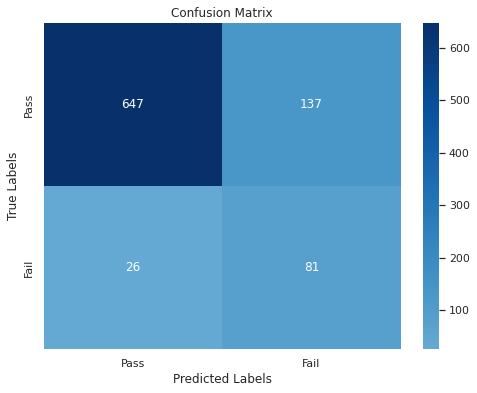

{'Accuracy': 0.8170594837261503, 'Confusion Matrix': array([[647, 137],
       [ 26,  81]]), 'Precision': 0.37155963302752293, 'Recall': 0.7570093457943925, 'F1 Score': 0.49846153846153834, 'F2 Score': 0.6269349845201238, 'AUC Score': 0.7911322239176044, 'TN': 647, 'FP': 137, 'FN': 26, 'TP': 81}


In [0]:
evaluate_model(LogisticRegression(C=0.1, solver='liblinear'), X_train, y_train, X_test, y_test)